# **Importing libraries and fetching the dataset**

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("weather_forecast_data.csv")
print("Data Shape:", df.shape)

print("Dataset: \n")
display(df.head())

Data Shape: (2500, 6)
Dataset: 



,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


# **Data Cleaning**

In [ ]:
print("Dataset Information: \n")
train_info = df.info()
display(train_info)
print('\n')
print("Dataset Statistical Summary: \n")
display(df.describe().T)

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


None



Dataset Statistical Summary: 



,count,mean,std,min,25%,50%,75%,max
Temperature,2500.0,22.581725,7.326996,10.001842,16.359398,22.536448,28.976476,34.995214
Humidity,2500.0,64.347094,19.954739,30.005071,47.339815,63.920797,81.561021,99.997481
Wind_Speed,2500.0,9.906255,5.780316,0.009819,4.761909,9.908572,14.948408,19.999132
Cloud_Cover,2500.0,49.658104,29.123104,0.015038,23.900016,49.488284,75.324140,99.997795
Pressure,2500.0,1014.312336,20.196433,980.014486,996.938630,1013.433035,1031.735067,1049.985593


In [ ]:
print('--- Missing Values in dataset---\n')
df_missing = df.isnull().sum()
print(df_missing)
print('\n')
# Check for duplicate rows in the dataset
df_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows in the dataset: {df_duplicates}")

--- Missing Values in dataset---

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64


Number of duplicate rows in the dataset: 0


In [ ]:
# Display the number of unique values in each column of the dataset
print("Unique values in dataset:")
df_unique_counts = df.nunique()
print(df_unique_counts)

Unique values in dataset:
Temperature    2500
Humidity       2500
Wind_Speed     2500
Cloud_Cover    2500
Pressure       2500
Rain              2
dtype: int64


In [ ]:
numerical_df = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_df = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

print("\nNumerical columns in the dataset:")
print(numerical_df)

print("\nNon-numerical columns in the dataset:")
print(non_numerical_df)


Numerical columns in the dataset:
['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']

Non-numerical columns in the dataset:
['Rain']


In [ ]:
print("\nUnique values for each categorical column in the dataset:")
for col in non_numerical_df:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")


Unique values for each categorical column in the dataset:

Column: Rain
Unique Values: ['rain' 'no rain']


**Summary of the Dataset Exploration is as follows:**


Unique Values and data type of the columns in the Dataset:

|Column Name| Structured Data Type | Number of Unique Values |
|---|:---:|:---:|
|Temperature| Numerical Data | 2500 |
|Humidity| Numerical Data | 2500 |
|Wind_Speed| Numerical Data | 2500 |
|Cloud_Cover| Numerical Data | 2500 |
|Pressure| Numerical Data | 2500 |
|Rain| Categorical | 2 |



- Rain has only two categorical values labelled as `['rain', 'no rain']`
- The data cleaning steps resulted in the following conclusions related to data cleaning steps:
  - No duplicate values. Some issues that are encountered due to presence of duplicate values are:
    - Matrix rank deficiency leading to $X^{T}X=0$ which implies Ordinary Least Squres may fail
    - Bias in Model Training
  - No missing data. Had there been missing data then the following could have been done:
    * If a lot of missing data (~40-50% of dataset), then need to drop it.
    * If a small fraction of the total rows has missing numerical data then mean imputation (for normally distributed data) or mode imputation (for skewed data) needed to be carried out
  - The categorical column doesn't have any inconsistent data.

# **Exploratory Data Analysis**

Tasks that have been carried out in this section are as follows:
- Distribution of features and the variable to be predicted in the dataset
- Distribution of the features for the `'rain'` and `'no rain'` condition
- Looking for outliers if any.

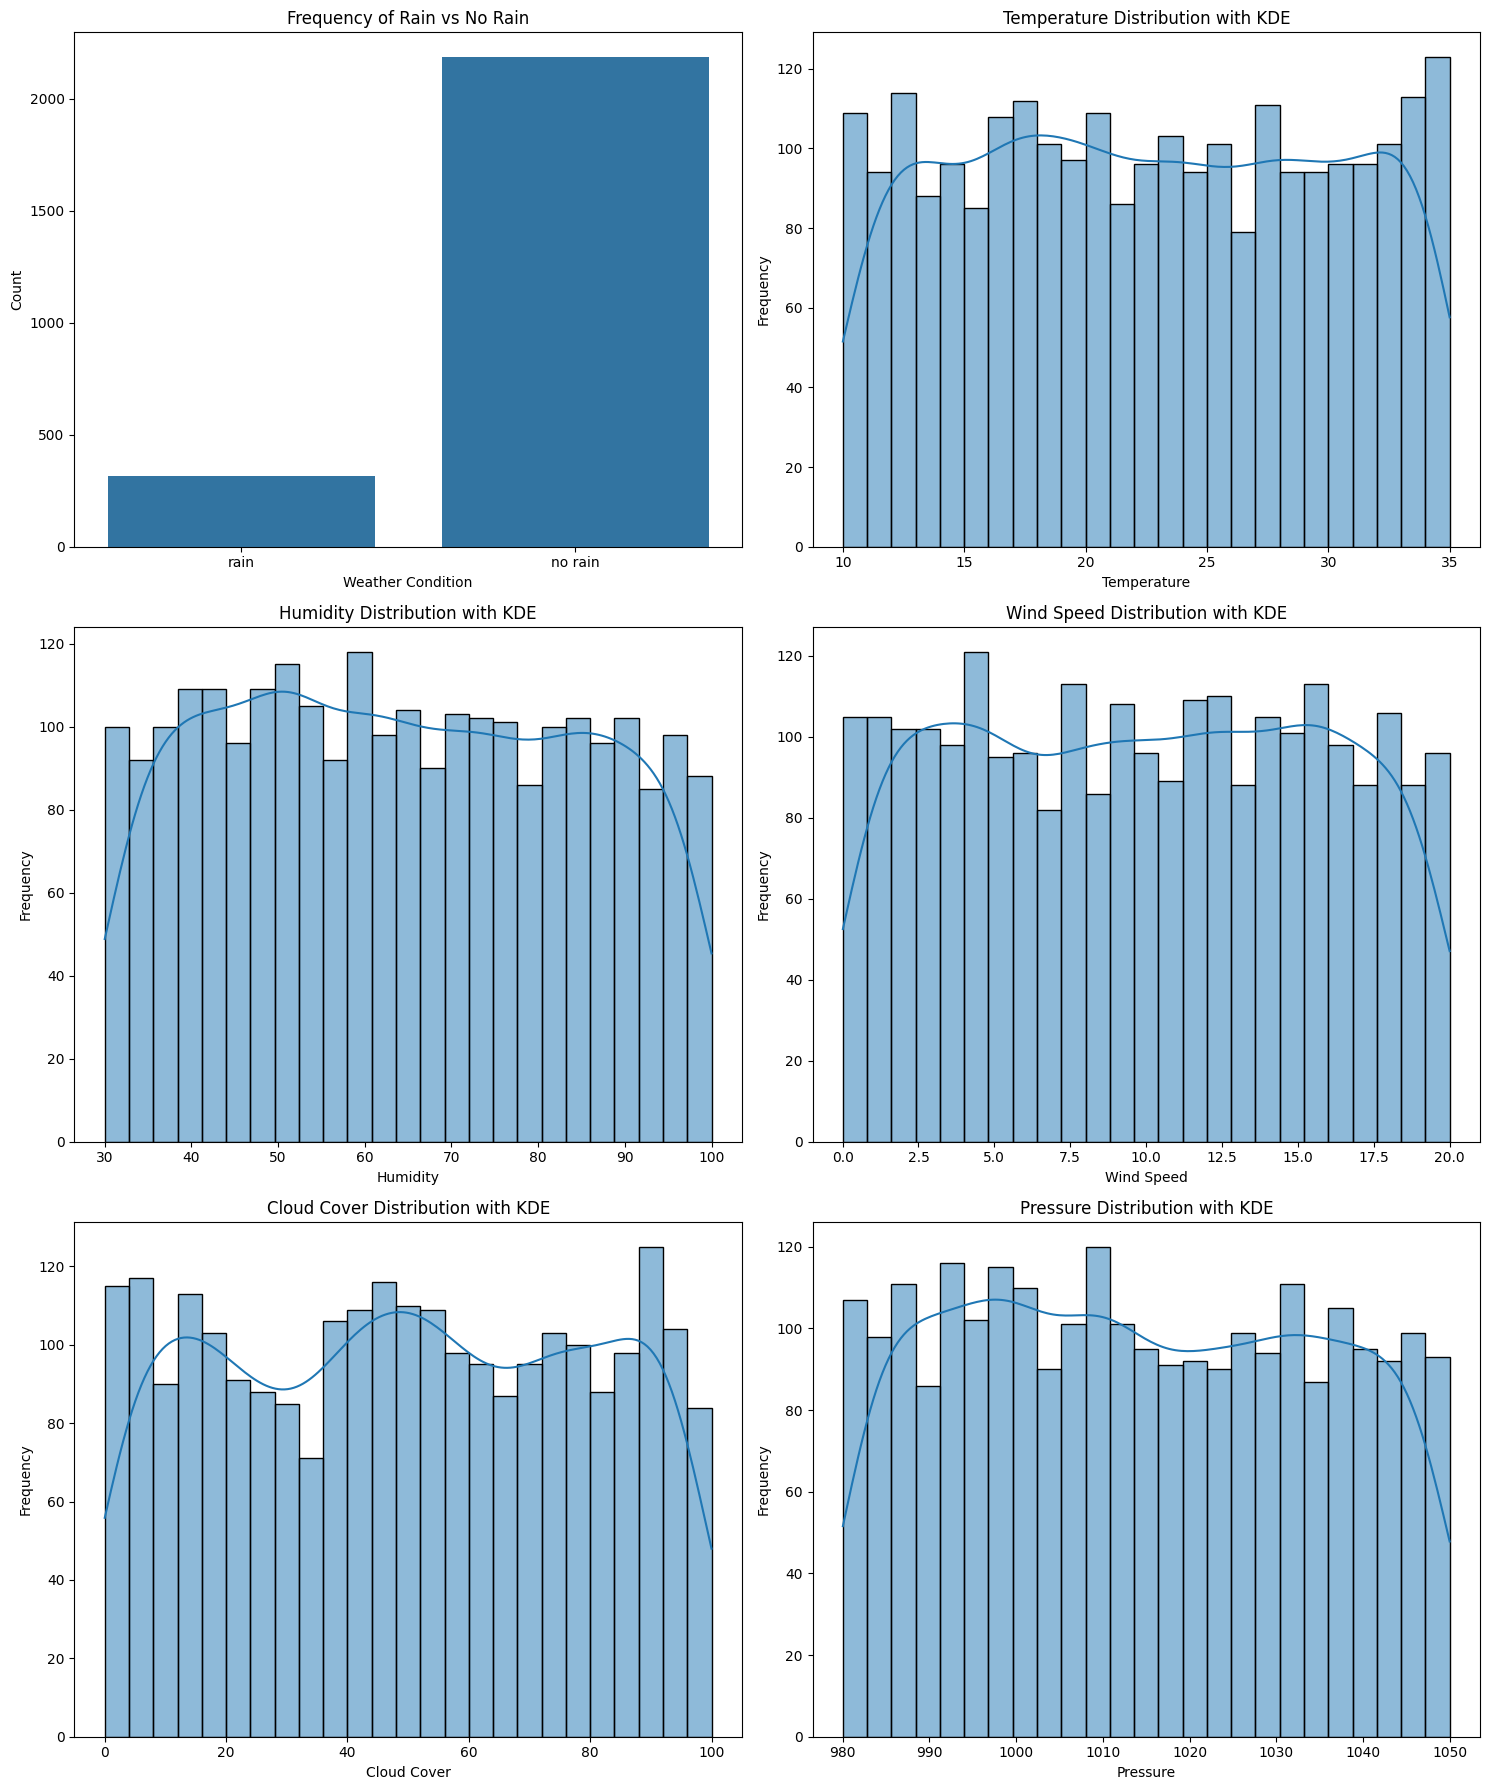

In [ ]:
def univariate_analysis(data, columns):
    plt.figure(figsize=(15, 18))  # Define figure size

    for i, column in enumerate(columns, 1):  # Start loop index from 1
        plt.subplot(3, 2, i)  # Define subplot layout

        if column == 'Rain':
            sns.countplot(x=data[column])  # Countplot for categorical data
            plt.title("Frequency of Rain vs No Rain")
            plt.xlabel("Weather Condition")
            plt.ylabel("Count")

        else:
            sns.histplot(data[column], kde=True, bins=25)  # Histogram for numerical data
            plt.title(f'{column.replace("_", " ")} Distribution with KDE')
            plt.xlabel(column.replace('_', ' '))
            plt.ylabel('Frequency')

    plt.tight_layout()  # Adjust layout to avoid overlapping
    plt.show()  # Show the entire figure at the end

# Define columns to analyze
columns_to_analyze = ['Rain', 'Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']

# Call the function
univariate_analysis(df, columns_to_analyze)

# **Data Preprocessing**

Since the values present in the Rain column are in the form of string so we need to convert it into encoded values. We choose `rain` = 1 and `no rain` = 0.

Manual Encoding of rain and no rain

In [ ]:

df['Rain_Encoded'] = df['Rain'].map({'no rain': 0, 'rain': 1})

display(df[['Rain', 'Rain_Encoded']].head())

,Rain,Rain_Encoded
0,rain,1
1,no rain,0
2,no rain,0
3,rain,1
4,no rain,0


Encoding using the Label Encoder predefined in sklearn. The encoding is done lexicographically by default

In [ ]:
# Alternate method of label encoding
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to the 'Rain' column
df['Rain_Encoded'] = le.fit_transform(df['Rain'])

# Display label encoding results
display(df[['Rain', 'Rain_Encoded']].head(10))

,Rain,Rain_Encoded
0,rain,1
1,no rain,0
2,no rain,0
3,rain,1
4,no rain,0
5,no rain,0
6,no rain,0
7,no rain,0
8,no rain,0
9,rain,1


# Training the Logistic Regression model using the inbuilt library

- First we split the data into test and train. The train dataset has 80% of the rows whereas the test dataset will have 20% of the dataset.
- Trivia - Here, while using the `train_test_split()` function, the random_state variable value of 42 ensures that in a single run multiple call to the function produces the same test train split.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


X = df.drop(columns=['Rain', 'Rain_Encoded'])  # Drop target variables
y = df['Rain_Encoded']  # Target variable

# Split Data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- The default values for the Logistic Regression model were used, which uses the $L_2-$ regularization and the solver is Limited-memory BFGS (Broyden–Fletcher–Goldfarb–Shanno).
-

In [ ]:
# Initialize and Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Model weights and bias
print("Weights of the Logistic Regression model: ",model.coef_)
print("\n Bias of the Logistic Regression model: ",model.intercept_)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Weights of the Logistic Regression model:  [[-1.84926808  2.61636131 -0.01959197  2.31212397  0.02858682]]

 Bias of the Logistic Regression model:  [-5.15431219]

 Accuracy: 0.9260

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       437
           1       0.72      0.68      0.70        63

    accuracy                           0.93       500
   macro avg       0.84      0.82      0.83       500
weighted avg       0.92      0.93      0.93       500


Confusion Matrix:
 [[420  17]
 [ 20  43]]


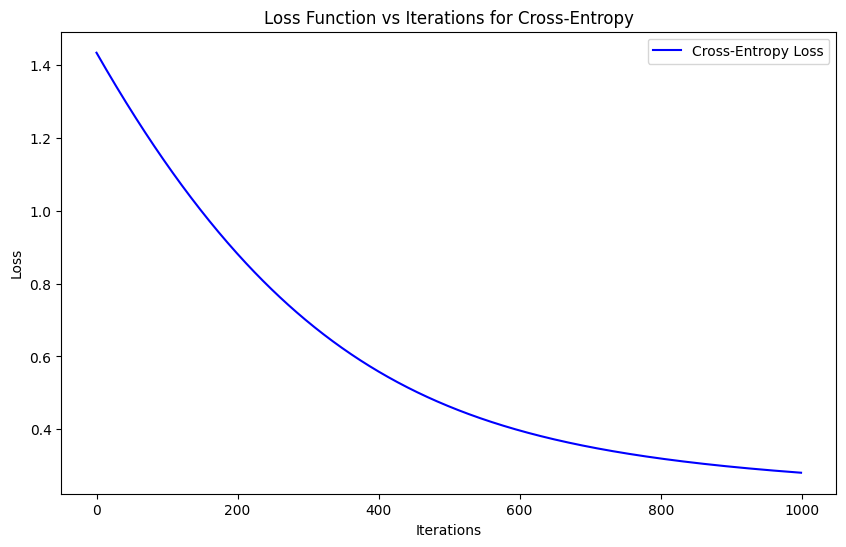

,Loss Function,Accuracy
0,Cross-Entropy,0.902
1,Log-Sum-Exp,0.368


(array([[419,  18],
        [ 31,  32]]),
 array([[121, 316],
        [  0,  63]]))

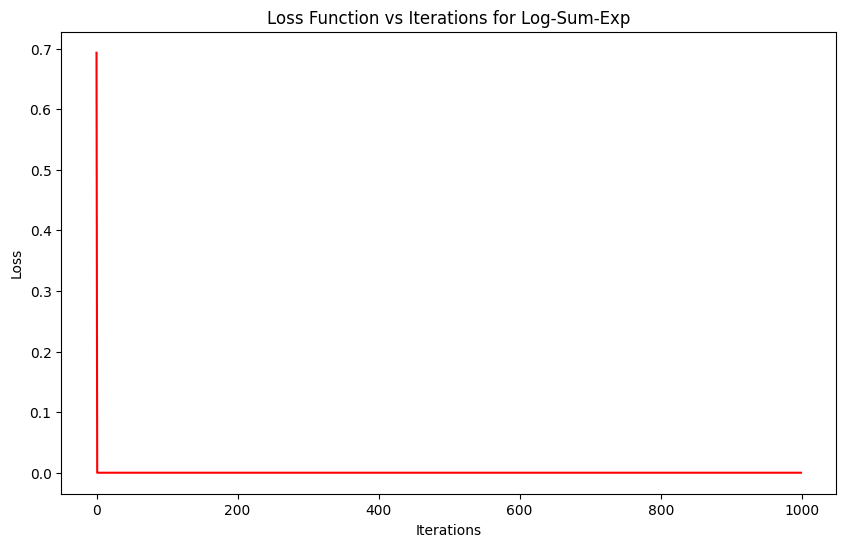

<Figure size 1000x600 with 0 Axes>

In [ ]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent for Logistic Regression
def GradientDescent_cross_entropy(X, y, learning_rate=0.01, iterations=1000):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    loss_history = []

    for i in range(iterations):
        y_hat = sigmoid(np.dot(X, weights))
        gradient = np.dot((y - y_hat), X) / X.shape[0]
        weights += learning_rate * gradient
        loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
        loss_history.append(loss)

    return weights[1:], weights[0], loss_history


def predict(X, weights, bias):
    X = np.insert(X, 0, 1, axis=1)
    return sigmoid(np.dot(X, np.append(bias, weights))) >= 0.5

def log_sum_exp_loss(w, X, y):
    return np.mean(np.log(1 + np.exp(-y * np.dot(X,w))))

def GradientDescent_Alt(X, y, learning_rate=0.01, iterations=10):
    X_bias = np.insert(X, 0, 1, axis=1)
    weights = np.zeros(X_bias.shape[1])
    loss_history = []
    m = X_bias.shape[0]

    for i in range(iterations):
        z = np.dot(X_bias, weights)
        loss = np.mean(np.log(1 + np.exp(np.dot(-y,z))))
        loss_history.append(loss)
        exp_term = np.exp(np.dot(y,z))
        grad = -np.dot(X_bias.T, (y / (1 + exp_term))) / m
        weights -= learning_rate * grad

    return weights[1:], weights[0], loss_history

weights_ce, bias_ce, loss_ce = GradientDescent_cross_entropy(X_train, y_train)

weights_lse, bias_lse, loss_lse = GradientDescent_Alt(X_train, y_train, learning_rate=0.5, iterations=1000)

# Using Cross-Entropy Model
y_pred_ce = predict(X_test, weights_ce, bias_ce)
# Using Log-Sum-Exp Model
y_pred_lse = predict(X_test, weights_lse, bias_lse)

# Evaluate accuracy
accuracy_ce = accuracy_score(y_test, y_pred_ce)
accuracy_lse = accuracy_score(y_test, y_pred_lse)

# Compute confusion matrices
conf_matrix_ce = confusion_matrix(y_test, y_pred_ce)
conf_matrix_lse = confusion_matrix(y_test, y_pred_lse)

plt.figure(figsize=(10, 6))
plt.plot(range(len(loss_ce)), loss_ce, label="Cross-Entropy Loss", color='blue')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Function vs Iterations for Cross-Entropy")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(loss_lse)), loss_lse, label="Log-Sum-Exp Loss", color='red')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Function vs Iterations for Log-Sum-Exp")
plt.figure(figsize=(10, 6))

# Display accuracy comparison
accuracy_results = pd.DataFrame({
    "Loss Function": ["Cross-Entropy", "Log-Sum-Exp"],
    "Accuracy": [accuracy_ce, accuracy_lse]
})

display(accuracy_results)

# Display confusion matrices
conf_matrix_ce, conf_matrix_lse
